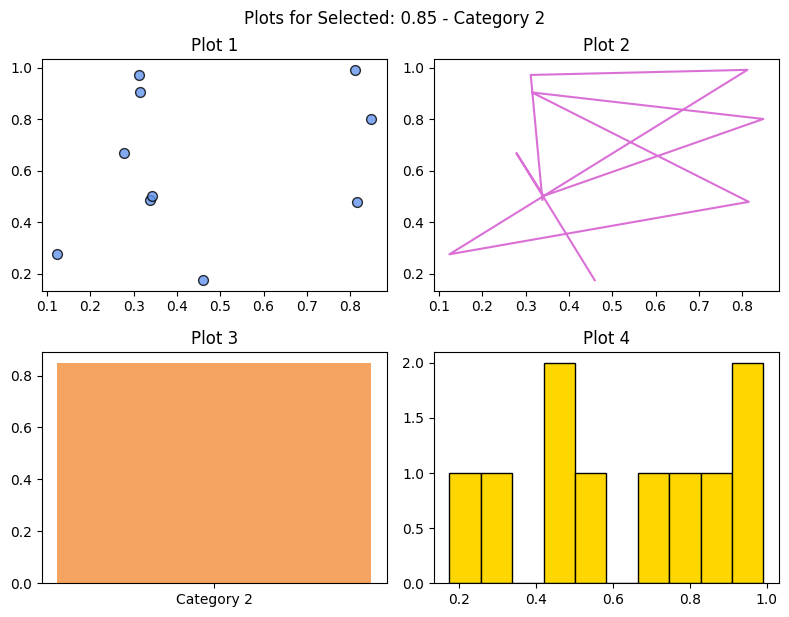

Dropdown(description='Select Option:', index=8, options=('0.96 - Category 3', '0.93 - Category 3', '0.93 - Cat…

In [2]:
## Designed to be run in a Jupyter Notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output, display #pip install ipywidgets
import ipywidgets as widgets  #pip install ipython

# Example Dataset (Replace with your own data)
data = {
    'Column1': np.random.rand(50),  # Replace with your data
    'Column2': np.random.rand(50),  # Replace with your data
    'Category': [f"Category {i%5}" for i in range(50)],  # Replace with your categories
}
dataframe = pd.DataFrame(data)

# Combine two columns (or any values) for the dropdown options
category_col = dataframe['Category']
value_col = dataframe['Column1']  # Replace with the column you want to combine
combined_options = [(f"{val:.2f} - {cat}", val) for val, cat in zip(value_col, category_col)]

# Ensure uniqueness and sort options by a value column
unique_sorted_options = sorted(set(combined_options), key=lambda x: x[1], reverse=True)

# Create the Dropdown widget
widget_dropdown = widgets.Dropdown(
    options=[option[0] for option in unique_sorted_options],
    value=unique_sorted_options[0][0],  # Default value
    description='Select Option:',
    style={'description_width': 'initial'}
)

# Function to update plots based on the dropdown selection
def on_value_change(change):
    selected_combined = change['new']
    
    # Parse the selected value and category from the dropdown
    selected_value, selected_category = selected_combined.split(" - ")
    selected_value = float(selected_value)

    # Filter the data based on selection (Replace with your conditions)
    selected_data = dataframe[dataframe['Category'] == selected_category]

    # Clear the previous plots
    clear_output(wait=True)

    # Create plots
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    axes = axes.flatten()

    # Define example plots (Replace with your plotting logic)
    colors = ["cornflowerblue", "orchid", "sandybrown", "gold"]

    # Plot 1
    axes[0].scatter(selected_data['Column1'], selected_data['Column2'], c=colors[0], s=50, 
                    edgecolors="black", alpha=0.8)
    axes[0].set_title("Plot 1")

    # Plot 2
    axes[1].plot(selected_data['Column1'], selected_data['Column2'], color=colors[1])
    axes[1].set_title("Plot 2")

    # Plot 3
    axes[2].bar(selected_data['Category'], selected_data['Column1'], color=colors[2])
    axes[2].set_title("Plot 3")

    # Plot 4
    axes[3].hist(selected_data['Column2'], bins=10, color=colors[3], edgecolor="black")
    axes[3].set_title("Plot 4")

    # Adjust layout
    fig.tight_layout()
    plt.suptitle(f"Plots for Selected: {selected_combined}", y=1.02)
    plt.show()

    # Add back the widget (after clearing)
    display(widget_dropdown)

# Attach the function to the dropdown widget's value change event
widget_dropdown.observe(on_value_change, names='value')

# Call the function to show the initial plots
on_value_change({'new': widget_dropdown.value})

# Display the widget
display(widget_dropdown)
